In [19]:
import pandas as pd
from tqdm import tqdm
import ast
import math

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

tqdm.pandas()

new_events_csv = f'../../generated/new_events_from_comet/ROCStories_with_new_triples_formatted_sample.csv'
new_events_df = pd.read_csv(new_events_csv, sep='\t', header=0)

forward_rels = ["xWant", "isBefore", "xEffect"]
backward_rels = ["xIntent", "isAfter", "xNeed"]


def forward_filter(triple):
    return triple[1] in forward_rels


def backward_filter(triple):
    return triple[1] in backward_rels


def get_forward_triples(triples, index):
    forward_events = []
    for triple in triples:
        if triple[1] == forward_rels[index]:
            forward_events.append(triple)
    return forward_events


def get_backward_events(triples, index):
    backward_events = []
    for triple in triples:
        if triple[1] == backward_rels[index]:
            backward_events += triple[2]
    return [a.strip() for a in backward_events]

In [2]:
new_events_not_formatted_csv = f'../../generated/new_events_from_comet/ROCStories_with_new_triples_not_formatted_part0_sample.csv'
new_events_not_formatted_df = pd.read_csv(new_events_not_formatted_csv, sep='\t', header=0)

In [3]:
new_events_not_formatted_df[new_events_not_formatted_df['storyid']=='000d05af-5db1-4d9d-b4e2-6c01b108b0b1']

,Unnamed: 0,storyid,sentence_id,new_events
6114,6114,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_1,"[['Brenna and I', 'be', 'best friends'], 'xWant', [' to spend time with her', ' to spend time with them', ' to go on a date', ' to hang out with her', ' to hang out with them', ' to have fun with her', ' to spend time together', ' to be friends forever', ' to have fun', ' to hang out']]"
6115,6115,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_1,"[['Brenna and I', 'be', 'best friends'], 'isBefore', [' have a good time', ' talk to each other', ' have fun with friends', ' have fun with her', ' meet new people', ' get to know them', ' have a good relationship', ' get to know someone', ' BRILL', ' meet new friends']]"
6116,6116,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_1,"[['Brenna and I', 'be', 'best friends'], 'xEffect', [' to be best friends', ' has a good time', ' has a new friend', ' have a good time', ' get to know someone', ' gets to know someone', ' get to know them', ' makes new friends', ' has a friend']]"
47199,47199,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xWant', [' to get away from her', ' to get away with it', ' to keep it a secret', ' to get revenge on her', ' to make her feel better', ' to get away with something', ' to make her feel bad', ' to get away from them', ' to hurt her feelings', ' talk to someone else']]"
47200,47200,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'isBefore', [' PersonY gets mad at PersonY', ' PersonY finds out about it.', ' PersonY finds out about the gossip', ' PersonY finds out about PersonY', ' PersonY finds out about the secret', ' PersonX finds out about the gossip', ' PersonX goes to jail.', ' PersonY finds out about it', ' PersonY finds out the truth', ' PersonX goes to jail']]"
47201,47201,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xEffect', [' gets yelled at', ' talk about her', ' talk to her', ' talk to someone', ' talk about them', ' talk to person', ' talk about someone', ' gossiping', ' talk about']]"
47202,47202,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xIntent', [' to be sneaky', ' to be secretive', ' to keep secrets', ' to hurt someone', ' to be mean', ' to hurt her', ' to gossip', ' gossiping', ' gossip']]"
47203,47203,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'isAfter', [' PersonY gets mad at PersonY', ' PersonX gets mad at PersonX', ' PersonY gets mad at me.', ' PersonX gets mad at me.', ' PersonY gets mad at PersonX', ' PersonX gets mad at PersonY', ' PersonX goes to jail.', ' PersonY gets mad at me', ' PersonX gets mad at me', ' PersonX goes to jail']]"
47204,47204,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_2,"[['I', 'talked', 'about her behind her back'], 'xNeed', [' to talk to her', ' to talk to someone', ' to have a secret', ' to make a plan', ' to talk to them', ' to have a conversation', ' to find her', ' talk to someone', ' talk to her', ' to know her']]"
209067,209067,000d05af-5db1-4d9d-b4e2-6c01b108b0b1,sentence_4,"[['her', 'started', 'ignoring me'], 'xWant', [' to ignore me back', ' stop talking to me', ' talk to someone else', ' to be left alone', ' to ignore me too', ' to talk to someone', ' to ignore me', ' to talk to me', ' to avoid me', ' talk to someone']]"


In [4]:
new_events_df.iloc[0:10]

Unnamed: 0  Unnamed: 0.1                               storyid  \
0           0             0  000d05af-5db1-4d9d-b4e2-6c01b108b0b1   
1           1             1  0027a743-92e4-4747-a7d6-1b0414211d74   
2           2             2  0056e52d-8cb1-476d-acfc-55ca1956c3ad   
3           3             3  0059a5df-25ab-4edc-86d1-44f7c5780876   
4           4             4  005da187-c8f3-4a1e-80c4-e43bcf36775f   
5           5             5  00658324-66e3-4b65-8285-7d989917f646   
6           6             6  006b3da2-44cd-4d43-9206-6bb4f81469e1   
7           7             7  006f7611-5c4a-4b1d-ab13-053bcac09a57   
8           8             8  007677ad-df55-4b02-a74b-dd8b65cb4603   
9           9             9  009ae11b-7013-4222-afe7-899da1cda381   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       sentence_1  \
0                                                                                                                                                                                                                                     

In [5]:
def keep_top_k_elements(l, k):
    if len(l) < k:
        return set(l)
    else:
        return set(l[:k])

In [6]:
new_events_df = new_events_df.iloc[:10]

In [7]:
n_rels = len(forward_rels)
pruned_triples = [[] for _ in range(5)]
deleted_triples = [[] for _ in range(5)]
for idx, row in tqdm(new_events_df.iterrows()):
    print(f'row {idx}')
    for f in range(1, 5):
        print(f'row {idx}, sentence {f}')
        triples_f = row[f'sentence_{f}']
        if isinstance(triples_f, float):
            pruned_triples[f-1].append([])
            continue
        triples_f = ast.literal_eval(triples_f)
        forward_events = list(filter(forward_filter, triples_f))
        backward_events = []
        for b in range(f+1, 6):
            triples_b = row[f'sentence_{b}']
            if not isinstance(triples_b, float):
                triples_b = ast.literal_eval(triples_b)
                backward_events += list(filter(backward_filter, triples_b))
        pruned_triples_f = []
        for rel in range(n_rels):
            print(f'row {idx}, sentence {f}, relation {forward_rels[rel]}')
            ft = get_forward_triples(forward_events, rel)
            be = get_backward_events(backward_events, rel)
            new_ft = []
            for triple in ft:
                triple_copy = [a for a in triple]
                triple_copy[2] = set([event.strip() for event in triple[2] if event.strip() in be])
                if triple_copy[2]:
                    new_ft.append(triple_copy)
            
            pruned_triples_f += new_ft
        pruned_triples[f-1].append(pruned_triples_f)

for f in range(1, 5):
    new_events_df[f'pruned_comet{f}'] = pruned_triples[f-1]

10it [00:00, 64.48it/s]

row 0
row 0, sentence 1
row 0, sentence 1, relation xWant
row 0, sentence 1, relation isBefore
row 0, sentence 1, relation xEffect
row 0, sentence 2
row 0, sentence 2, relation xWant
row 0, sentence 2, relation isBefore
row 0, sentence 2, relation xEffect
row 0, sentence 3
row 0, sentence 4
row 0, sentence 4, relation xWant
row 0, sentence 4, relation isBefore
row 0, sentence 4, relation xEffect
row 1
row 1, sentence 1
row 1, sentence 1, relation xWant
row 1, sentence 1, relation isBefore
row 1, sentence 1, relation xEffect
row 1, sentence 2
row 1, sentence 2, relation xWant
row 1, sentence 2, relation isBefore
row 1, sentence 2, relation xEffect
row 1, sentence 3
row 1, sentence 3, relation xWant
row 1, sentence 3, relation isBefore
row 1, sentence 3, relation xEffect
row 1, sentence 4
row 1, sentence 4, relation xWant
row 1, sentence 4, relation isBefore
row 1, sentence 4, relation xEffect
row 2
row 2, sentence 1
row 2, sentence 1, relation xWant
row 2, sentence 1, relation isBefore


In [8]:
def count_triples(triples):
    count = 0
    for triple in triples:
        count += len(triple[2])
    return count

In [9]:
for f in range(1,5):
    new_events_df[f'pruned_events_count{f}'] = new_events_df[f'pruned_comet{f}'].apply(count_triples)

In [10]:
from matplotlib import pyplot as plt

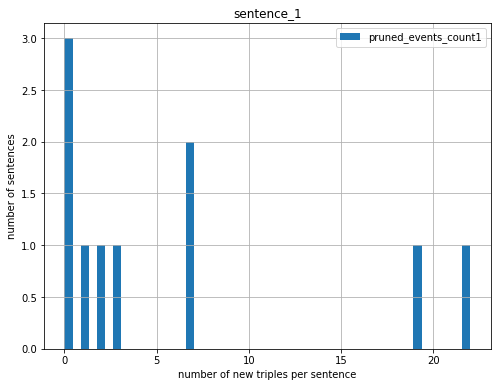

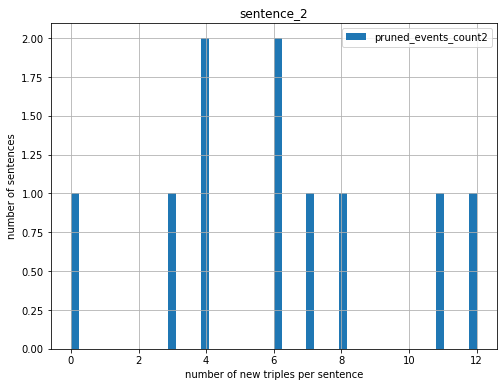

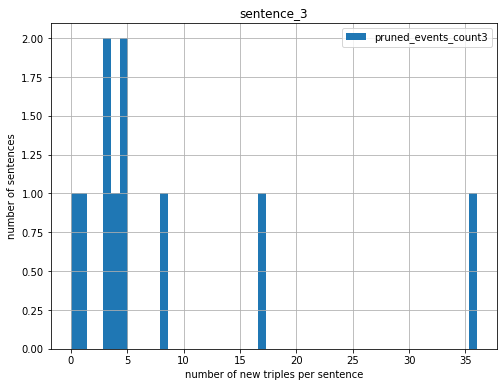

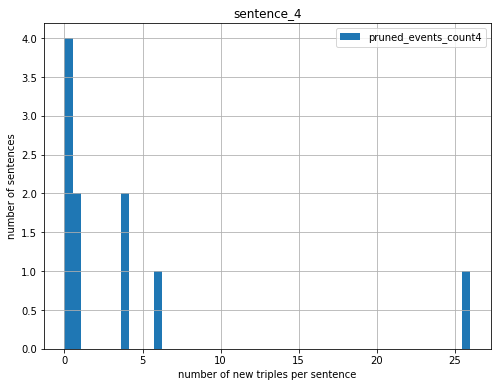

In [11]:
for f in range(1,5):
    hist = new_events_df.hist(bins=50, legend=True, figsize=(8,6),column=f'pruned_events_count{f}')

    plt.xlabel('number of new triples per sentence')
    plt.ylabel('number of sentences')
    plt.title(f'sentence_{f}')

In [15]:
roc_stories_triples_csv = '../../generated/knowledge-triple-extraction/ROCStories_resolved_with_knowledge_triples.csv'
roc_stories_triples_df = pd.read_csv(roc_stories_triples_csv, sep='\t', header=0)

res_df = roc_stories_triples_df.iloc[:10].merge(new_events_df, how='outer', on='storyid')

In [18]:
new_events_df

Unnamed: 0  Unnamed: 0.1                               storyid  \
0           0             0  000d05af-5db1-4d9d-b4e2-6c01b108b0b1   
1           1             1  0027a743-92e4-4747-a7d6-1b0414211d74   
2           2             2  0056e52d-8cb1-476d-acfc-55ca1956c3ad   
3           3             3  0059a5df-25ab-4edc-86d1-44f7c5780876   
4           4             4  005da187-c8f3-4a1e-80c4-e43bcf36775f   
5           5             5  00658324-66e3-4b65-8285-7d989917f646   
6           6             6  006b3da2-44cd-4d43-9206-6bb4f81469e1   
7           7             7  006f7611-5c4a-4b1d-ab13-053bcac09a57   
8           8             8  007677ad-df55-4b02-a74b-dd8b65cb4603   
9           9             9  009ae11b-7013-4222-afe7-899da1cda381   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       sentence_1  \
0                                                                                                                                                                                                                                     

In [16]:
del res_df['srl_r1']
del res_df['Unnamed: 0_x']
del res_df['Unnamed: 0.1_x']
del res_df['Unnamed: 0.1.1']
del res_df['Unnamed: 0.1.1.1']
del res_df['Unnamed: 0_y']
del res_df['Unnamed: 0.1_y']

In [17]:
res_df.iloc[:10]

,storyid,storytitle,sentence1,sentence2,sentence3,sentence4,sentence5,coref_clusters,resolved1,resolved2,resolved3,resolved4,resolved5,triples1,triples2,triples3,triples4,triples5,sentence_1,sentence_2,sentence_3,sentence_4,sentence_5,pruned_comet1,pruned_comet2,pruned_comet3,pruned_comet4,pruned_events_count1,pruned_events_count2,pruned_events_count3,pruned_events_count4
0,9a51198e-96f1-42c3-b09d-a3e1e067d803,Overweight Kid,Dan's parents were overweight.,Dan was overweight as well.,The doctors told his parents it was unhealthy.,His parents understood and decided to make a change.,They got themselves and Dan on a diet.,"[Dan: [Dan, Dan, his, His, Dan], Dan's parents: [Dan's parents, his parents, His parents, They, themselves]]",Dan's parents were overweight.,Dan was overweight as well.,The doctors told Dan's parents it was unhealthy.,Dan's parents understood and decided to make a change.,Dan's parents got Dan's parents and Dan on a diet.,"[[""Dan 's parents"", 'were', 'overweight']]","[['Dan', 'was', 'overweight'], ['Dan', 'was', 'as well']]","[['The doctors', 'told', ""Dan 's parents""], ['The doctors', 'told', 'it was unhealthy'], ['it', 'was', 'unhealthy']]","[[""Dan 's parents"", 'decided', 'to make a change'], [""Dan 's parents"", 'make', 'a change']]","[[""Dan 's parents"", 'got', ""Dan 's parents and Dan""], [""Dan 's parents"", 'got', 'on a diet']]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,617e7ada-3878-488d-bd56-40695b91f053,The Bike Accident,Carrie had just learned how to ride a bike.,She didn't have a bike of her own.,Carrie would sneak rides on her sister's bike.,She got nervous on a hill and crashed into a wall.,The bike frame bent and Carrie got a deep gash on her leg.,"[Carrie: [Carrie, She, her, Carrie, her, She, Carrie, her]]",Carrie had just learned how to ride a bike.,Carrie didn't have a bike of Carrie own.,Carrie would sneak rides on Carrie sister's bike.,Carrie got nervous on a hill and crashed into a wall.,The bike frame bent and Carrie got a deep gash on Carrie leg.,"[['Carrie', 'learned', 'just'], ['Carrie', 'learned', 'how to ride a bike'], ['Carrie', 'ride', 'how'], ['Carrie', 'ride', 'a bike']]","[['Carrie', 'have', ""n't""], ['Carrie', 'have', 'a bike of Carrie own']]","[['Carrie', 'sneak', 'would'], ['Carrie', 'sneak', ""rides on Carrie sister 's bike""]]","[['Carrie', 'got', 'nervous'], ['Carrie', 'got', 'on a hill'], ['Carrie', 'crashed', 'into a wall']]","[['Carrie', 'got', 'a deep gash on Carrie leg']]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79b0da1f-e460-4173-ba58-8c9e2553c53a,Beach,Morgan enjoyed long walks on the beach.,She and her boyfriend decided to go for a long walk.,"After walking for over a mile, something happened.",Morgan decided to propose to her boyfriend.,Her boyfriend was upset he didn't propose to her first.,"[Morgan: [Morgan, She, her, Morgan, her, Her, he], her boyfriend: [her boyfriend, her boyfriend, Her boyfriend, her]]",Morgan enjoyed long walks on the beach.,Morgan and Morgan boyfriend decided to go for a long walk.,"After walking for over a mile, something happened.",Morgan decided to propose to her boyfriend.,her boyfriend was upset Morgan didn't propose to her boyfriend first.,"[['Morgan', 'enjoyed', 'long walks on the beach']]","[['Morgan and Morgan boyfriend', 'decided', 'to go for a long walk'], ['Morgan and Morgan boyfriend', 'go', 'for a long walk']]","[['something', 'happened', 'After walking for over a mile']]","[['Morgan', 'decided', 'to propose to her boyfriend'], ['Morgan', 'propose', 'to her boyfriend']]","[['her boyfriend', 'was', ""upset Morgan did n't propose to her boyfriend first""], [""Morgan did n't propose to her boyfriend first"", 'upset', 'her boyfriend'], ['Morgan', 'propose', ""n't""], ['Morgan', 'propose', 'to her boyfriend'], ['Morgan', 'propose', 'first']]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d173b7de-4611-4cdf-934c-912834755e41,The bad customer.,Jane was working at a diner.,"Suddenly, a customer